<a href="https://colab.research.google.com/github/aymenzayene/roboticarm/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np# Import the NumPy library and give it an alias 'np' for numerical operations.

import cv2 as cv# Import the OpenCV library and give it an alias 'cv' for image processing.

from google.colab.patches import cv2_imshow# Import the 'cv2_imshow' function from Google Colab's patches module for displaying images.
img=cv.imread('/content/objekt46.jpg')# Read an image file named 'photoseuillage3.jpg' located in the '/content/' directory using OpenCV's 'imread' function.

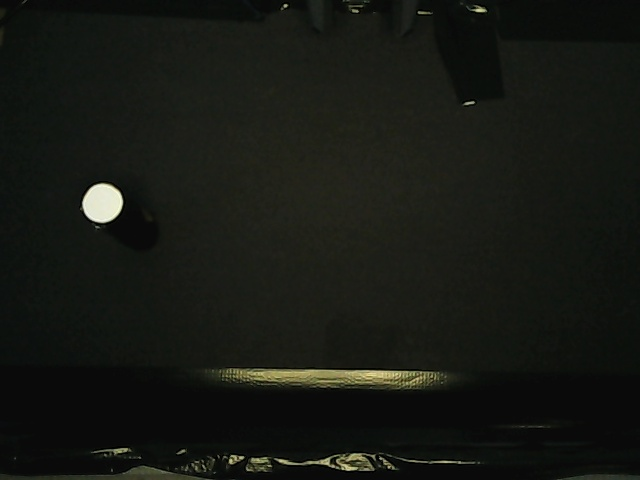

In [ ]:
# Display the image
cv2_imshow(img)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
img.shape# Get the dimensions of the image (height, width, and channels if it's a color image)

(480, 640, 3)

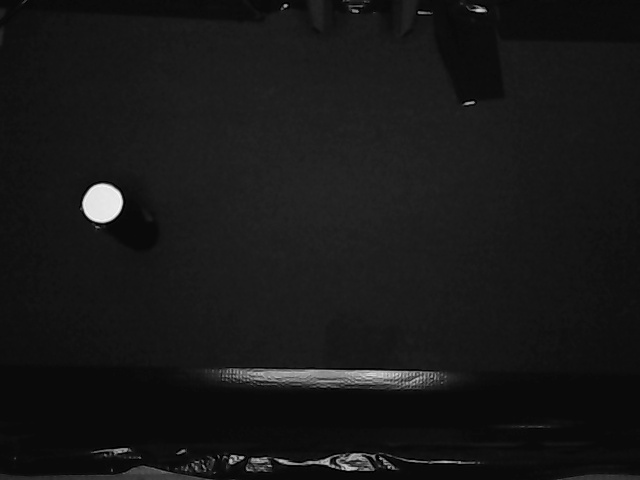

In [ ]:
gimage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)# Convert the image to grayscale
cv2_imshow(gimage)# Display the grayscale image

In [ ]:
gimage.shape# Get the dimensions of the grayscale image (height, width)

(480, 640)

In [ ]:
gimage.max()#Find the maximum pixel value in the grayscale image

250

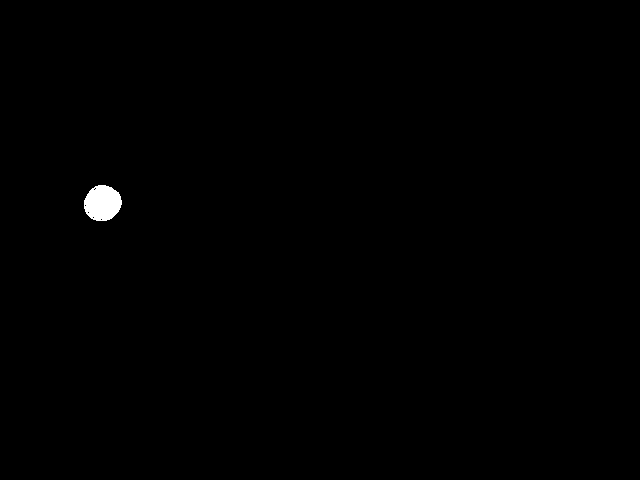

In [ ]:
# Apply a binary threshold to the grayscale image
# Pixels below 145 become 0 (black), and pixels above 145 become 240 (white)
#newImg = cv.adaptiveThreshold(gimage, 170, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
# Apply GaussianBlur to reduce noise and improve thresholding
blurred = cv.GaussianBlur(gimage, (5, 5), 0)

#(retVal, newImg) = cv.threshold(gimage, 145, 240, cv.THRESH_BINARY)
(retVal, newImg)=cv.threshold(gimage,220,255,0)

# Display the resulting binary image
cv2_imshow(newImg)

In [ ]:
# Find contours in the binary image (newImg)
# Using RETR_EXTERNAL retrieval mode to retrieve only the external contours
# Using CHAIN_APPROX_SIMPLE to approximate the contours and save memory
contours, hierarchy = cv.findContours(newImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
# Select a specific contour from the list of contours (in this case, the second contour at index 1)
cnt=contours[0]
# Print the selected contour
print (cnt)

[[[ 98 185]]

 [[ 97 186]]

 [[ 95 186]]

 [[ 93 188]]

 [[ 92 188]]

 [[ 89 191]]

 [[ 89 192]]

 [[ 87 194]]

 [[ 87 195]]

 [[ 86 196]]

 [[ 86 197]]

 [[ 85 198]]

 [[ 85 199]]

 [[ 84 200]]

 [[ 84 208]]

 [[ 85 209]]

 [[ 85 211]]

 [[ 86 212]]

 [[ 86 213]]

 [[ 91 218]]

 [[ 92 218]]

 [[ 93 219]]

 [[ 95 219]]

 [[ 96 220]]

 [[106 220]]

 [[107 219]]

 [[109 219]]

 [[110 218]]

 [[111 218]]

 [[118 211]]

 [[118 210]]

 [[119 209]]

 [[119 208]]

 [[120 207]]

 [[120 205]]

 [[121 204]]

 [[121 200]]

 [[120 199]]

 [[120 196]]

 [[119 195]]

 [[119 194]]

 [[118 193]]

 [[118 192]]

 [[117 192]]

 [[115 190]]

 [[114 190]]

 [[111 187]]

 [[109 187]]

 [[108 186]]

 [[106 186]]

 [[105 185]]]


In [ ]:

# Calculate the moments of the selected contour (cnt)

M = cv.moments(newImg)
# Calculate the centroid of the contour
# The centroid coordinates are represented by 'cx' and 'cy'
cx = int(M['m10']/M['m00'])# X-coordinate of the centroid
cy = int(M['m01']/M['m00'])# Y-coordinate of the centroid
# Print the centroid coordinates
print(cx,cy)

102 202


In [ ]:
print(M['m10'])# Print the value of the moment 'm10', which represents the sum of X-coordinate products of contour pixels

27536430.0


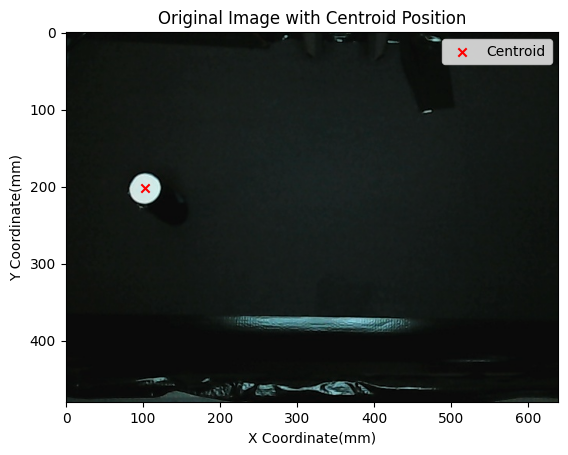

In [ ]:
import matplotlib.pyplot as plt# Import the matplotlib library for image visualization
plt.imshow(img)# Display the original image using matplotlib
plt.imshow(img, cmap='gray')
plt.scatter(cx, cy, c='red', marker='x', label='Centroid')
plt.title('Original Image with Centroid Position')
plt.xlabel('X Coordinate(mm)')
plt.ylabel('Y Coordinate(mm)')
plt.legend()
plt.show()
